In [1]:
import numpy as np
import matplotlib.pyplot as plt

Init parameters



In [10]:
# initial parameters

# inital speed (shooting speed)
u = 13

# shooting angle (in degree)
theta = 45

# timestep length (small time period for earh loop)
dt = 0.0001

# number of timestep (number of iteration)
N = 50000

# acceleration vector
# no horizontal acceleration -> ax = 0
# gravity -> ay = -9.8
acc = np.array([0, -9.8])

sx_max = 0


Calculate initial speed in x and y axis

In [11]:
ux = u * np.cos(theta/180 * np.pi)
uy = u * np.sin(theta/180 * np.pi)
print(ux, uy)

9.19238815542512 9.192388155425117


Create and init the arrays of position and velocities

In [12]:
# 2D array for storing x, y of each timestep
# pos[i] = [x, y]
# vel[i] = [vx, vy]
pos = np.zeros((N+1, 2)) 
vel = np.zeros((N+1, 2))

# first row: inital position and velocity
# pos[0] = [0, 0]
pos[0] = np.array([0,0])

# vel[0] = [Ux, Uy] = [U_COS_theta, U_SIN_theta]
vel[0] = np.array([ux, uy])

Looping for the Euler's Method to calculate position and velocity

In [13]:
for i in range (0, N):
  vel[i+1] = vel[i] + acc * dt
  pos[i+1] = pos[i] + vel[i] * dt
  if pos[i+1, 1] <= 0:
    sx_max = pos[i+1, 0]
    break

print(pos)

[[0.         0.        ]
 [0.00091924 0.00091924]
 [0.00183848 0.00183838]
 ...
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]


Ploting x-y position

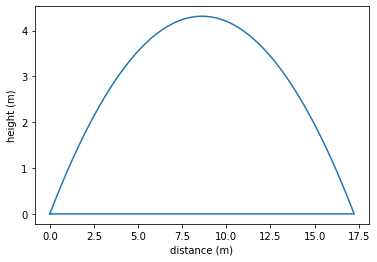

17.245839418394194


In [14]:
# x: first colume of the postion array
# y: second colume of the position array
plt.xlabel('distance (m)')
plt.ylabel('height (m)')
plt.plot(pos[:,0], pos[:,1])
plt.show()
print(sx_max)

Define the projectile function

In [24]:
def projectile(u, theta, plot=False):
  # timestep length (small time period for earh loop)
  dt = 0.0001
  # number of timestep (number of iteration)
  N = 50000
  # acceleration vector
  acc = np.array([0, -9.8])

  sx_max = 0

  # calculate ux and uy
  ux = u * np.cos(theta/180 * np.pi)
  uy = u * np.sin(theta/180 * np.pi)

  # 2D array for storing x, y of each timestep
  pos = np.zeros((N+1, 2)) 
  vel = np.zeros((N+1, 2))
  # first row: inital position and velocity
  pos[0] = np.array([0,0])
  # vel[0] = [Ux, Uy] = [U_COS_theta, U_SIN_theta]
  vel[0] = np.array([ux, uy])

  # Use Euler's method
  for i in range (0, N):
    vel[i+1] = vel[i] + acc * dt
    pos[i+1] = pos[i] + vel[i] * dt
    if pos[i+1, 1] <= 0:
      sx_max = pos[i+1, 0]
      break

  # Plot the graph
  if plot:
    plt.xlabel('distance (m)')
    plt.ylabel('height (m)')
    plt.plot(pos[:,0], pos[:,1])
    plt.show()
    print(sx_max)

  return sx_max

Vary u and plot

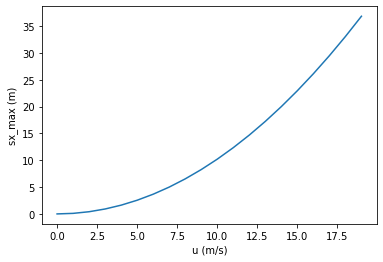

In [28]:
theta = 45
n = 20
sx_max = []

for u in range(n):
  sx_max.append(projectile(u,theta))

plt.xlabel('u (m/s)')
plt.ylabel('sx_max (m)')
plt.plot(range(n),sx_max)
plt.show()

Vary theta and plot

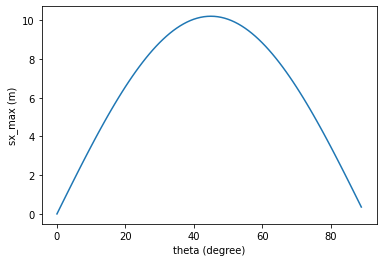

In [31]:
u = 10
n = 90
sx_max = []

for theta in range(n):
  sx_max.append(projectile(u,theta))

plt.xlabel('theta (degree)')
plt.ylabel('sx_max (m)')
plt.plot(range(n),sx_max)
plt.show()